In [5]:
import scvelo as scv
from IPython.display import clear_output
import matplotlib.backends.backend_pdf
from tqdm import tnrange, tqdm_notebook
import scanpy as sc
import matplotlib.pyplot as pl
import pandas as pd
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
%matplotlib inline


scv.logging.print_version()
scv.settings.set_figure_params(
    'scvelo', dpi_save=150, dpi=80, transparent=True)
scv.settings.verbosity = 2

Running scvelo 0.1.16.dev32+c00a55e.dirty (python 3.6.6) on 2021-01-27 20:24.


In [6]:
# paths and names
data_path='G:/data/scSLAMseq/revision/'
signatures_path='G:/data/scrnaseq_signature_collection/'
figure_path='G:/data/figures/'
libraries = ['AB', 'CE', 'DF']
donors=['B2-040', 'C2-019', 'OT227', 'OT302', 'P009T', 'P013T']

pert_colors=['#fff989', '#858585', '#c31f26', '#ff7f26', '#af3cb1', '#00a8f3']  # my colors
single_genes = ['LGR5', 'OLFM4', 'TFF3', 'FABP1', 'EPHB2', 'AXIN1', 'AXIN2', 'EGR1']
colors=[
    'Stem_Lgr5_ISC-Merlos', 'Stem', 'Enterocytes 1', 'Enterocytes 2', 'TC1', 'TC2', 'TC3', 'TC4', 'Goblet',
    'phase', 'percent_ribosomal', 'perturbation', 'YAP_targets', 'MAPK_progeny', 'Stem', 'Stem_TA 1', 'Stem_TA 2', 'Stem_TA 3', 'schinken'
] # 'Stem_Lgr5_ISC-Munoz', 

# Plot and save

In [7]:
from pathlib import Path
Path(data_path+'SLAM_umaps/').mkdir(parents=True, exist_ok=True)
scv.settings.figdir=figure_path
scv.settings.plot_prefix=''
from scvelo.plotting.utils import default_size
scv.settings.set_figure_params(
    'scvelo', dpi_save=200, dpi=80, transparent=True)

saving figure to file G:/data/figures/decomposed_umaps/B2-040_perturbations_umap_ccregressed_genes.pdf


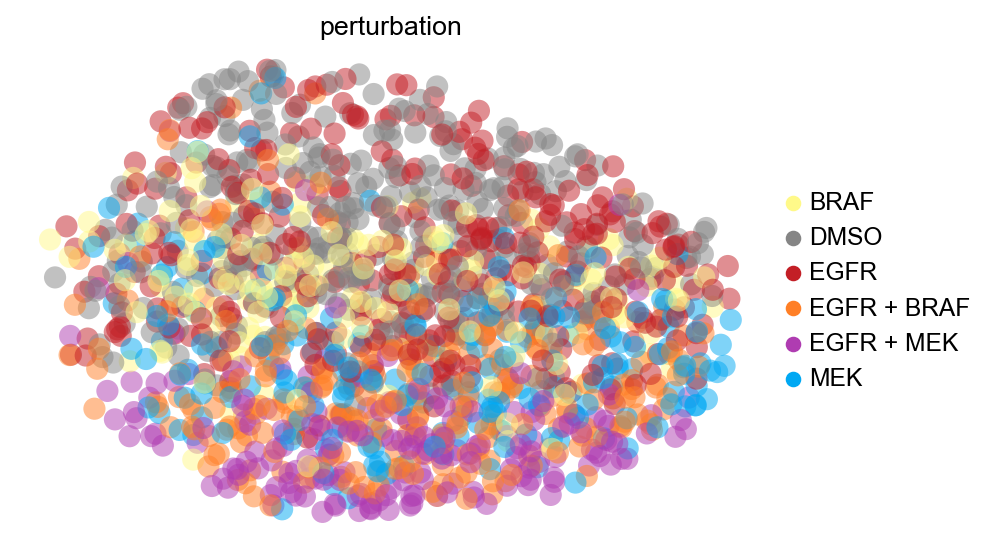

saving figure to file G:/data/figures/decomposed_umaps/C2-019_perturbations_umap_ccregressed_genes.pdf


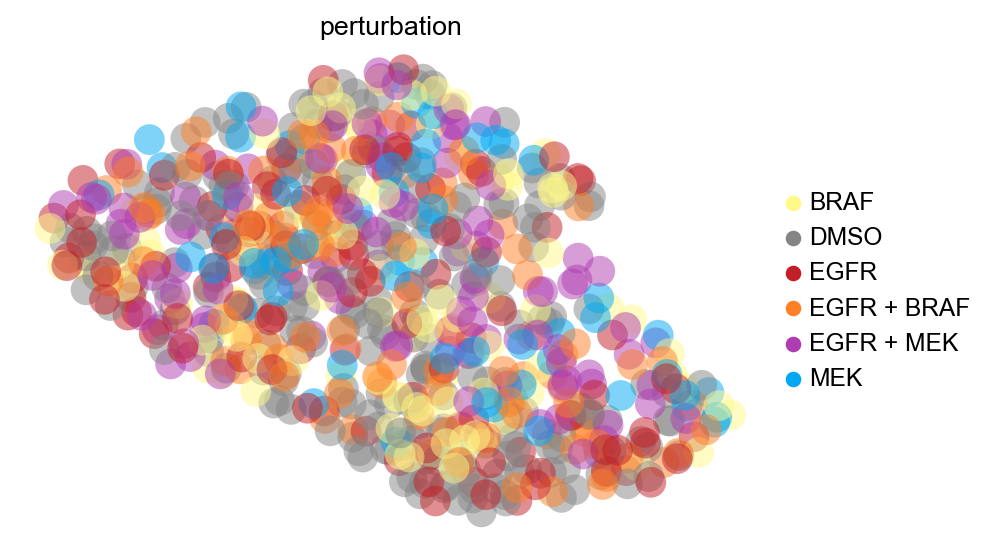

saving figure to file G:/data/figures/decomposed_umaps/OT227_perturbations_umap_ccregressed_genes.pdf


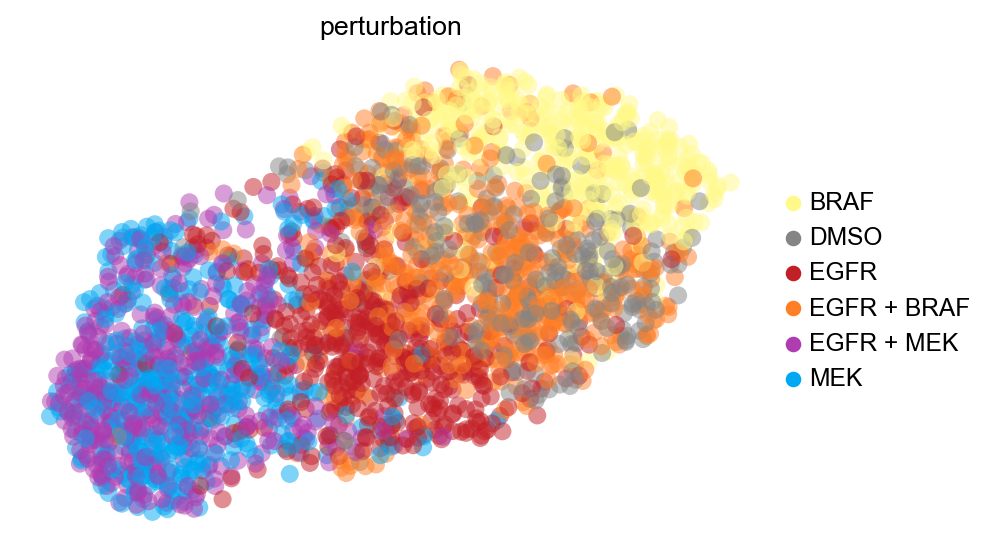

saving figure to file G:/data/figures/decomposed_umaps/OT302_perturbations_umap_ccregressed_genes.pdf


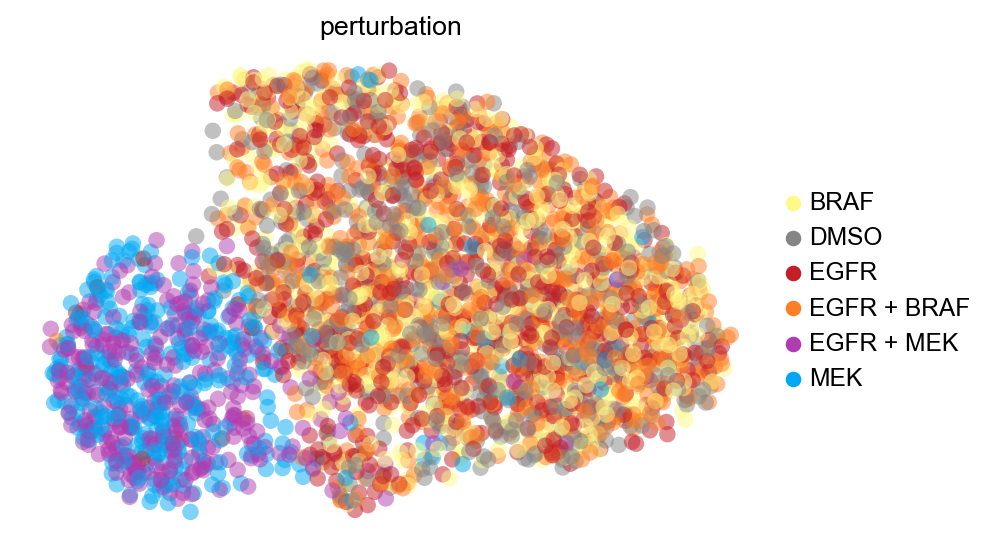

saving figure to file G:/data/figures/decomposed_umaps/P009T_perturbations_umap_ccregressed_genes.pdf


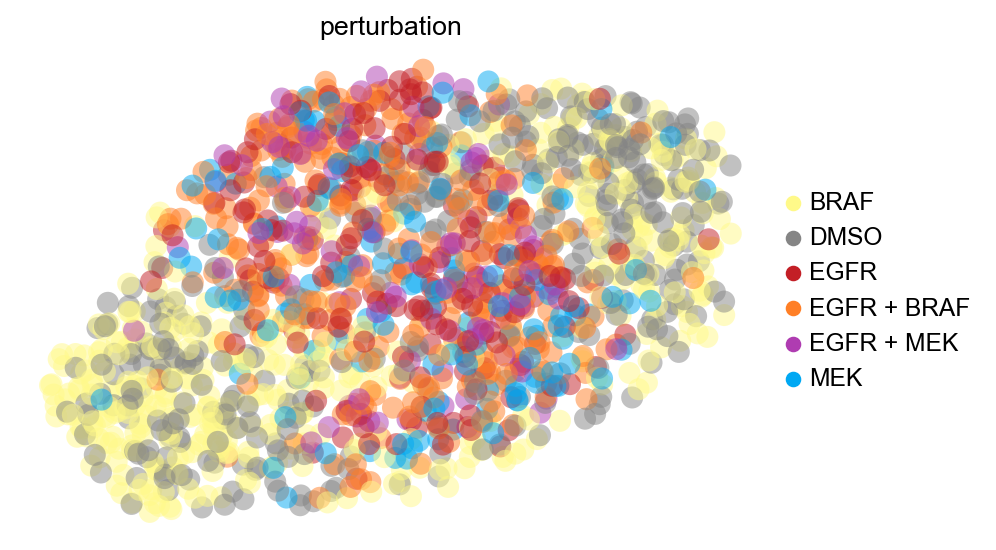

saving figure to file G:/data/figures/decomposed_umaps/P013T_perturbations_umap_ccregressed_genes.pdf


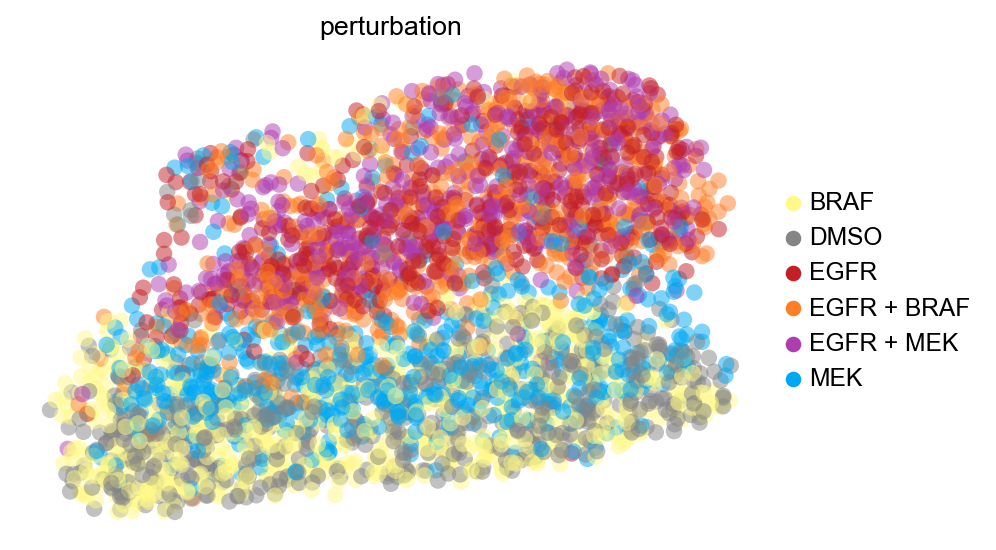

In [7]:
# just a umap with perturbation colors, cc regressed
ccreg = True

for donor in donors:
    cckey= '' if ccreg else 'not'
    cc = '_ccreg' if ccreg else ''
    adata=sc.read(data_path+'by_donors/processed/SLAMv2_'+donor+'_processed'+'_ccreg'+'.h5')
    adata.uns['perturbation_colors']=pert_colors
    size = 8 * default_size(adata)
    scv.pl.scatter(adata, color='perturbation', perc=[1,99], size=size, alpha=0.5, legend_loc='right_margin', sort_order=False, save=donor+'_perturbations_umap_cc'+cckey+'regressed_genes.pdf')
    del adata